<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_BostonChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construcción de modelos con Keras

En este ejercicio implementarás regresión múltiple para predecir el precio de casas ubicadas en Bostón.
Se considera múltiple porque el precio de una casa depende de más de una característica.
Definirás la(s) MLP(s) que tu propongas y entrenarás con los datos y precios del conjunto de entrenamiento. Esperarás que el modelo aprenda el "patrón" que modela los precios. Por ejemplo, que una casa con bajo índice de criminalidad (CRIM) y un alto grado de industrialización (INDUS) vale más que otra con alto CRIM y bajo INDUS.
La magia de los modelos de Deep Learning es que estas "reglas" no las tienes que indicar explicitamente al modelo (como sí lo harías si no emplearas Machine Learning). La MLP a través del entrenamiento las determina. Incluso es capas de determinar (aprender) reglas que no son tan fáciles de ver en los datos.
### Let's go!

In [0]:
import matplotlib.pyplot as plt           # Librería para graficar    
import numpy as np                        # Librería para cálculos matemáticos con arreglos
from sklearn.datasets import load_boston  # Función para descargar la base de datos
# EJERCICIO
# Incluye aquí las funciones de keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import backend 
# Incluye el método de sklearn para dividir los datos en entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Para este ejercicio la base de datos esta precargada en la librería de sklearn. Sin embargo, representa datos reales recolectados en Bostón, EUA.
El link de la base de datos es:
- This is a copy of UCI ML housing dataset:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


In [0]:
# Lectura de los datos de las casas ubicadas en Boston
boston_data = load_boston()   # Esta función devuelve los datos

In [0]:
# La propiedad DESC nos describe las caracteristicas de las que depende el modelo.
# Las características son desde CRIM a la LSTAT
# El precio de las casas esta en la varibale MEDV
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# Aquí haremos la separación de las características los valores deseados
x = boston_data['data']       # Esta matriz contendrá las características de las que depende el precio de una casa
y = boston_data['target']     # Este vector contendrá los precios de las casas de Bostón. "y" es el target o valor deseado 

In [0]:
print('Contamos con: {} registros'.format(x.shape[0]))
print('Cada registro cuenta con: {} características'.format(x.shape[1]))

Contamos con: 506 registros
Cada registro cuenta con: 13 características


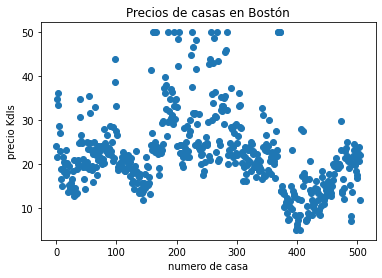

In [0]:
# Análisis Exploratorio de Datos 
# Graficaremos los precios para las 506 casas. Esto te servirá para visualizar la cantidad de casas que tienen un precio bajo y alto.
n_elementos = x.shape[0]                              # Esta variable contiene el valor del numero total de casas: 506                        
x_vector = np.linspace(0,n_elementos-1, n_elementos)  # Este vector contiene valores desde el 0 hasta el 505. Nos servirá para graficar los precios de las casas
plt.scatter(x_vector,y)
plt.title('Precios de casas en Bostón')
plt.xlabel('numero de casa')
plt.ylabel('precio Kdls')
plt.show()

## Procesamiento de los datos

In [0]:
# EJERCICIO
# Divide las características "x" y precios "y" en dos conjuntos: para entrenamiento y prueba
# Considera un 15% de los datos para el conjunto de test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [0]:
print('El numero de registros en el conjunto x_train es:', x_train.shape[0])
print('El numero de registros en el conjunto y_train es:', y_train.shape[0])
print('El numero de registros en el conjunto x_test es:', x_test.shape[0])
print('El numero de registros en el conjunto y_test es:', y_test.shape[0])

El numero de registros en el conjunto x_train es: 430
El numero de registros en el conjunto y_train es: 430
El numero de registros en el conjunto x_test es: 76
El numero de registros en el conjunto y_test es: 76


## Creación del modelo

In [0]:
# EJERCICIO
# Escribe la instrucción que elimina los modelos creados con keras 
# Recuerda que es necesario eliminar el modelo cada que se desee volver a entrenar
backend

<module 'keras.backend' from '/usr/local/lib/python3.6/dist-packages/keras/backend/__init__.py'>

In [0]:
# EJERCICIO
# Define aqui tu modelo. Puedes construirlo desde 1 capa, 2 capas (1 capa oculta y 1 de salida) o las que tu quieras. 
# Tip 1: comienza con modelos pequeños y luego aumentas su tamaño. 
# Tip 2: Como los precios de las casas estan fuera del rango de (0,1) no será posible usar funciones sigmoide o tangente hiperbólica. 
# Para usar estas funciones debimos de escalar los precios de las casas para que esten entre 0 y 1. Sin embargo es posible 
# manejar los datos en su forma original (sin escalar) si se utilizan funciones de activación que lo permitan.
# Aqui puedes utilizar funciones 'linear' o 'relu' en las que su salida puede ofrecer valores mayores a 1.

# RECUERDA QUE ÚNICAMENTE LA PRIMER CAPA DEBE LLEVAR EL PARÁMETRO: input_shape = (numero_de_características,)

modelo_1 = Sequential()
modelo_1.add(Dense(64, use_bias=True, activation='relu', input_shape=(13,))) 
modelo_1.add(Dense(32, use_bias=True, activation='relu')) 
modelo_1.add(Dense(1)) 
# Fin de la definición del modelo

# La siguiente línea de código es para mostrar la tabla con las características del modelo
modelo_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [0]:
# EJERCICIO
# Define el optimizador Adam
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0, epsilon=1e-8)

In [0]:
# EJERCICIO
# Compila el modelo definiendo el optimizador "adam", la función de costo (loss) como el promedio del cuadrado de los errores "mean_squared_error"
# y la metrica como el "mse"
modelo_1.compile(optimizer=adam, loss='mean_squared_error', metrics=['mse'])

In [0]:
# EJERCICIO
# Entrena el modelo eligiendo un número de epocas y los datos de entrenamiento y validación
# Recuerda que guardamos el entrenamiento en una variable para poder graficar el error
M = modelo_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

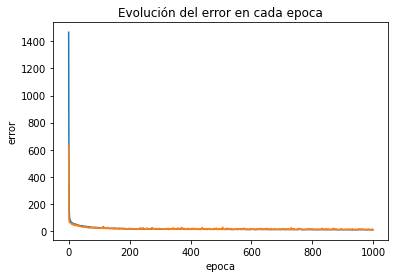

In [0]:
# Grafica de la evolución del error a traves de cada época
# Recuerda que esta gráfica te da la pauta para saber si debes aumentar el numero de epocas, entrenar de nuevo o quedarte con el modelo
plt.plot(M.history['loss'], label = 'error en entrenamiento')
plt.plot(M.history['val_loss'], label = 'error en validacion')
plt.title('Evolución del error en cada epoca')
plt.xlabel('epoca')
plt.ylabel('error')
plt.show()

## Evaluación del modelo
En esta sección realizaremos pruebas sobre el modelo.

In [0]:
# Ejecutamos una predicción sobre la información de la casa 100 
registro_casa_100 = x[100]    # extraemos la información de la casa 100
registro_casa_100 = registro_casa_100.reshape(1,13) # transformamos la variable a dos dimensional. Esto será necesario para ocuparla dentro del modelo
valor_real_100 = y[100]       # este es el precio real de la casa

# EJERCICIO
# Ejecuta el metodo predict de tu modelo y guarda la predicción en la varibale prediccion_100
prediccion_100 =  modelo_1.predict(registro_casa_100)
print('La casa 100 tiene un costo real de {} klds, el modelo predice el costo en {} kdls'.format(valor_real_100, prediccion_100))

La casa 100 tiene un costo real de 27.5 klds, el modelo predice el costo en [[23.268444]] kdls


In [0]:
# Ejecutamos una predicción sobre una casa imaginaria que tiene los siguientes datos 
casa_de_mis_suenos = np.array([[0.2, 0.001, 10.5, 0, 0.5, 6.3, 42.5, 3.9, 4, 280, 19, 380, 11]])

# EJERCICIO
# Ejecuta el metodo predict de tu modelo sobre las características de la casa de mis sueños y guarda el valor en prediccion_mi_casa
prediccion_mi_casa = modelo_1.predict(casa_de_mis_suenos)
print('La casa de mis sueños tiene un costo de {} kdls'.format(prediccion_mi_casa))


La casa de mis sueños tiene un costo de [[22.716105]] kdls


In [0]:
# Evaluación general
# Esta será una evaluación general del modelo con los datos de todas las casas

# EJERCICIO
# Ejecuta la predición de todas las casas (modelo_1.predict(x) -> ya que x guarda los datos de todas las casas).
# Almacena las predicciones en predicciones_506_casas
predicciones_506_casas = modelo_1.predict(x)

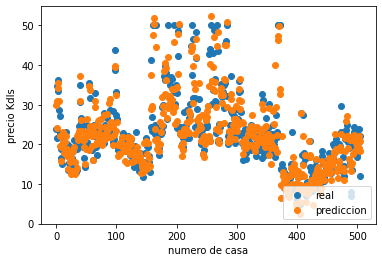

In [0]:
# Las siguientes lineas de código graficaran en azul los precios reales y en anaranjado los precios que el modelo predice.
# Si tienes un modelo perfecto la dos graficas deberán superponerse. Si no logras esto no de desanimes, casi nunca sucede esto
# en Machine Learning :(
plt.scatter(x_vector, y, label='real')
plt.scatter(x_vector, predicciones_506_casas, label='prediccion')
plt.legend(loc='lower right')
plt.xlabel('numero de casa')
plt.ylabel('precio Kdls')
plt.show()

In [0]:
# Una forma numerica de evaluar un modelo es con el score r2. Entre más cercana se encuentre la métrica al 1 el modelo tendrá buen desempeño
# si el modelo es malo r2 tendra valores cercanos a 0 o serán incluso negativos.
# Conoce el score r2 de tu modelo

from sklearn.metrics import r2_score

r2 = r2_score(y, predicciones_506_casas)
print("El r2 de tu modelo es:", r2)

# EJERCICIO PLUS
# Calcular el r2 unicamente con datos de test
y_test_pred = modelo_1.predict(x_test)
r2_val = r2_score(y_test, y_test_pred)
print("El r2 de tu modelo en validacion es:", r2_val)

El r2 de tu modelo es: 0.9013524905089532
El r2 de tu modelo en validacion es: 0.8802594366380225
